In [ ]:
# Import libraries
from utils import *

In [2]:
# Load data (please note to change file location below)
df = pd.read_csv('~/weather_data_bucharest_2000_2023.csv', encoding = "ISO-8859-1")

In [3]:
# Split data into independent and dependent variables. The first column should be the dependent variable y.
y = df.iloc[:, 0] # The Y-axis variable
x = df.iloc[:, 1:] #.drop(columns='temp', axis=1)

In [4]:
# Split the data into 3 samples: train, cross validation (cv) and test
x_train, x_, y_train, y_ = train_test_split(x, y, train_size=.6, shuffle=False)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=.5, shuffle=False)

The selected best min splits is 30, best max depth is 8 and the best n estimators is 50.


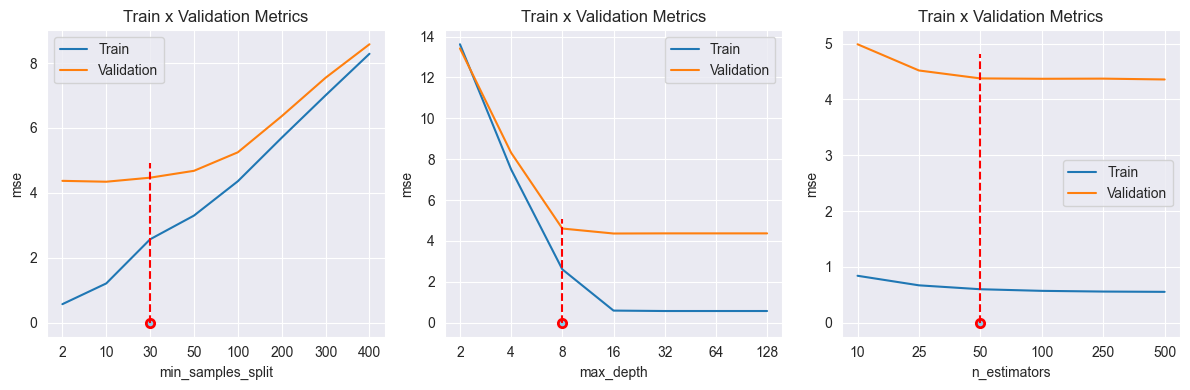

In [5]:
# Calculating the best parameters for Random Forest Regression given the set
best_min_split, best_max_depth, best_n_estimators = BestParam.best_forest_regressor(x_train, y_train, x_cv, y_cv)

,feature,gini
0,month_cos,0.822354
1,dew,0.119011
2,humidity,0.032033
3,cloudcover,0.013244
4,sunup_hours,0.002275
5,windspeed,0.002106
6,precip,0.001872
7,sealevelpressure,0.001489
8,conditions_snow,0.000930
9,winddir,0.000880


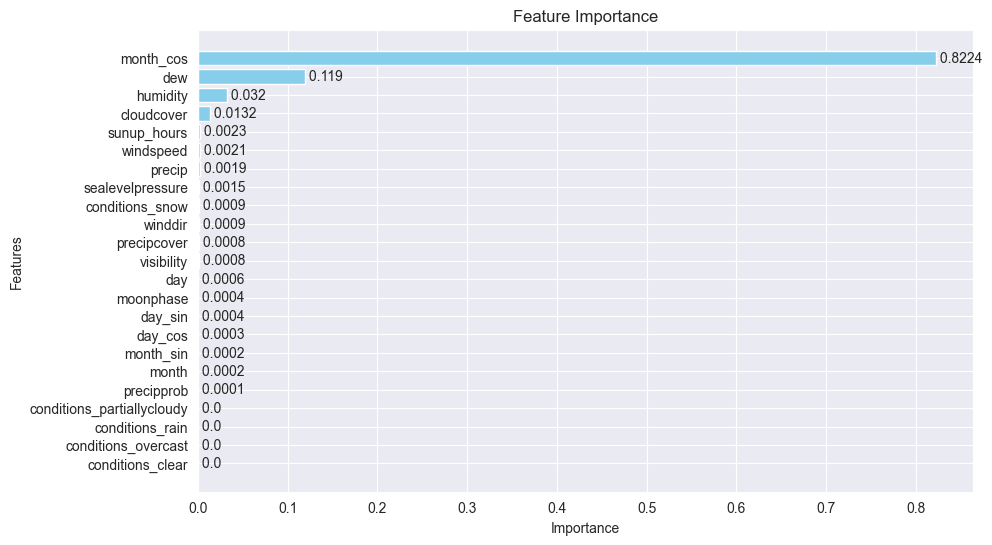

In [6]:
# Calculating the Gini coefficient for the variables and select the ones above 0
all_feature_importance = feature_importance(x_train, y_train, best_min_split, best_max_depth, best_n_estimators) 
# The parameters values are based on the previous step. Feel free to change if relevant
all_feature_importance

In [7]:
# Filter the samples to only include the selected features
x_train_all = x_train[list(all_feature_importance.iloc[:, 0])]
x_cv_all = x_cv[list(all_feature_importance.iloc[:, 0])]

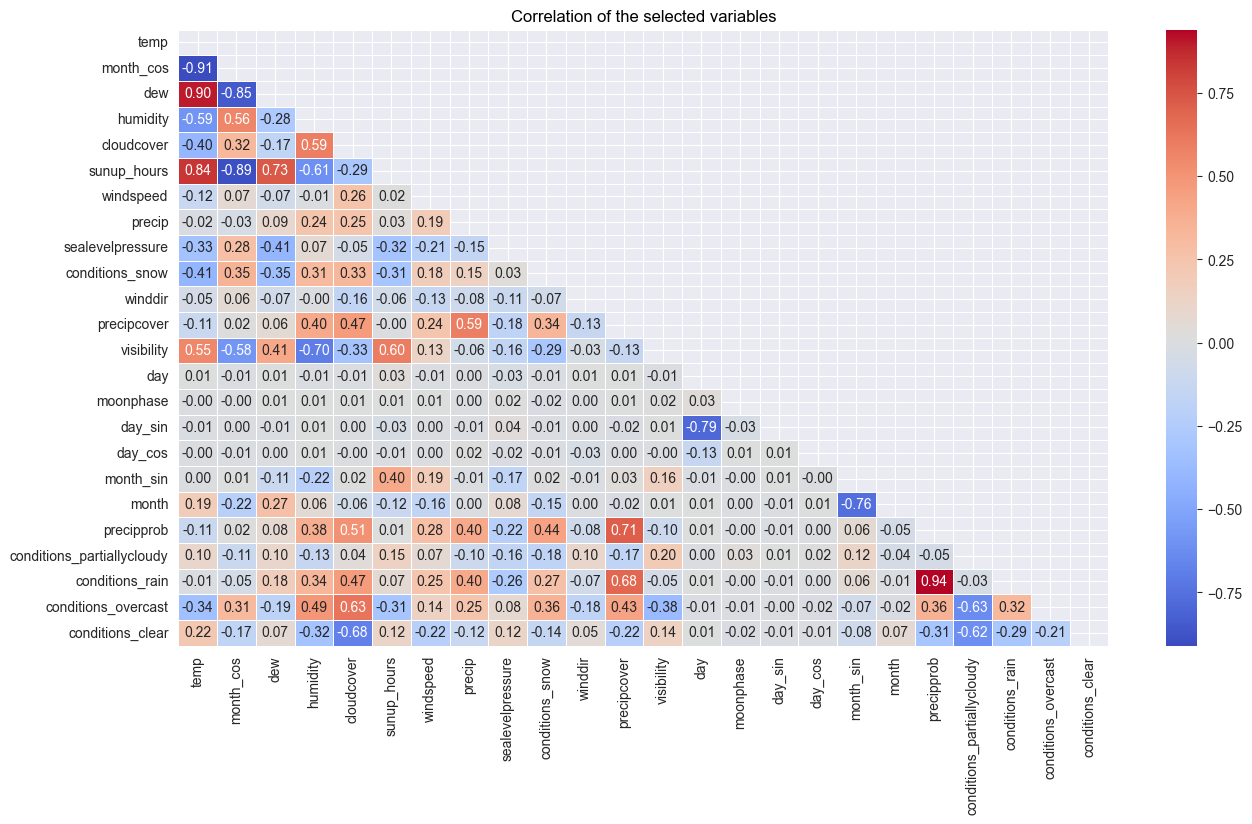

In [8]:
# Visualize the feature correlations via a heat map
plot_correlation_heatmap(x_train_all, y_train)

Running for Polynomial degree = 1
Added column dew with the MSE: 14.991077873743905
Added column humidity with the MSE: 4.862086502366717
Added column month_cos with the MSE: 4.5596628252281
Added column cloudcover with the MSE: 4.353259482326949
Added column precipprob with the MSE: 4.290084461937064
Added column sunup_hours with the MSE: 4.219467711712045

Selected features: ['dew', 'humidity', 'month_cos', 'cloudcover', 'precipprob', 'sunup_hours'] 

Running for Polynomial degree = 2
Added column month with the MSE: 19.048329448896837
Added column month_sin with the MSE: 15.062328640871373
Added column day with the MSE: 13.318872544187586
Added column conditions_snow with the MSE: 12.129329122586123
Added column windspeed with the MSE: 11.364162160206128
Added column sealevelpressure with the MSE: 10.373787969434785
Added column conditions_rain with the MSE: 9.843380599508672
Added column visibility with the MSE: 9.600878547209991
Added column winddir with the MSE: 9.42722724033814


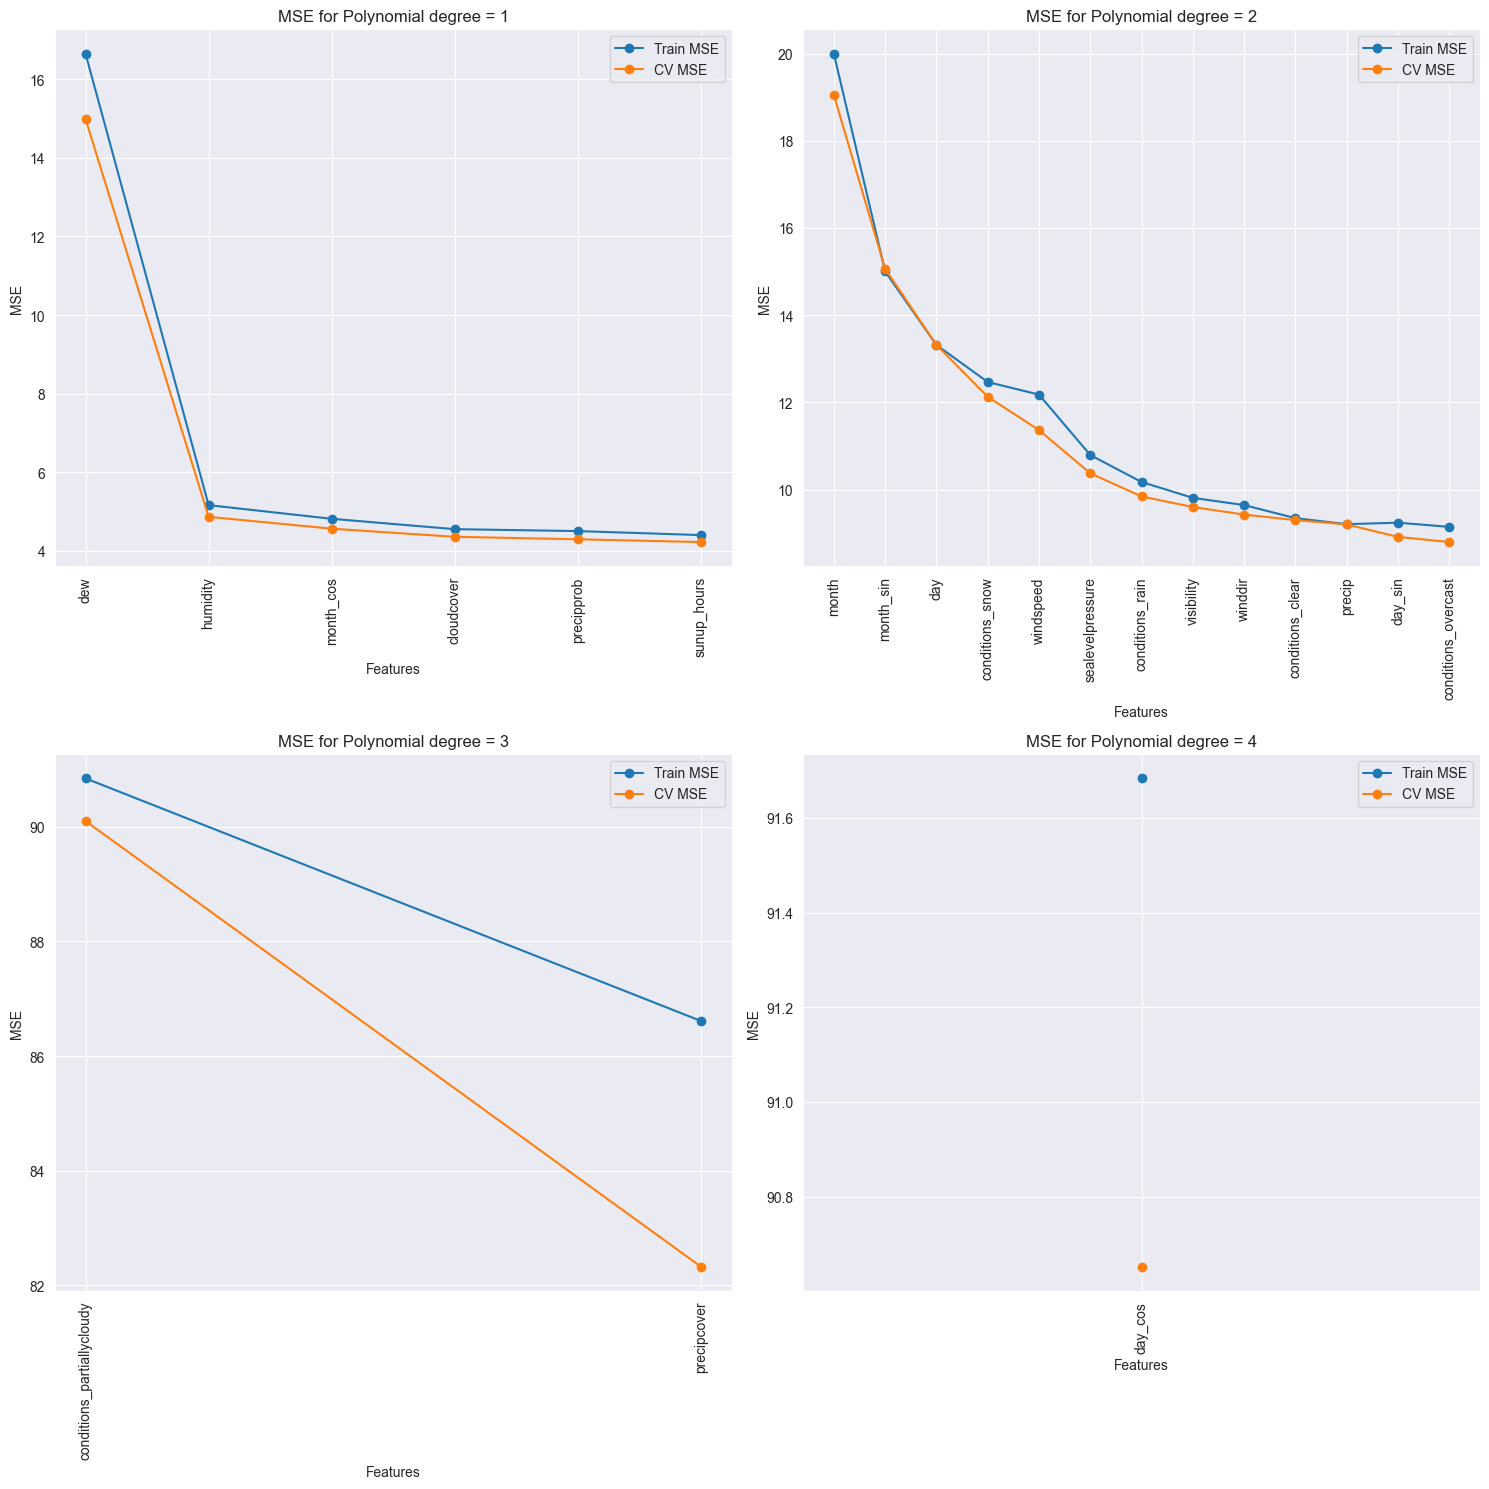

Features selected with the minimum CV MSE of 1 are ['dew', 'humidity', 'month_cos', 'cloudcover', 'precipprob', 'sunup_hours']


In [9]:
# Compute the MSE using linear regression model by adding each feature to a new model. Iterate this throughout 4 degrees of polynomial.
selected_features, all_feature_importance = linear_regeression_feature_performance(x_train_all, y_train, x_cv_all, y_cv, all_feature_importance,  reduce_corr=False, corr_limit=0.8)

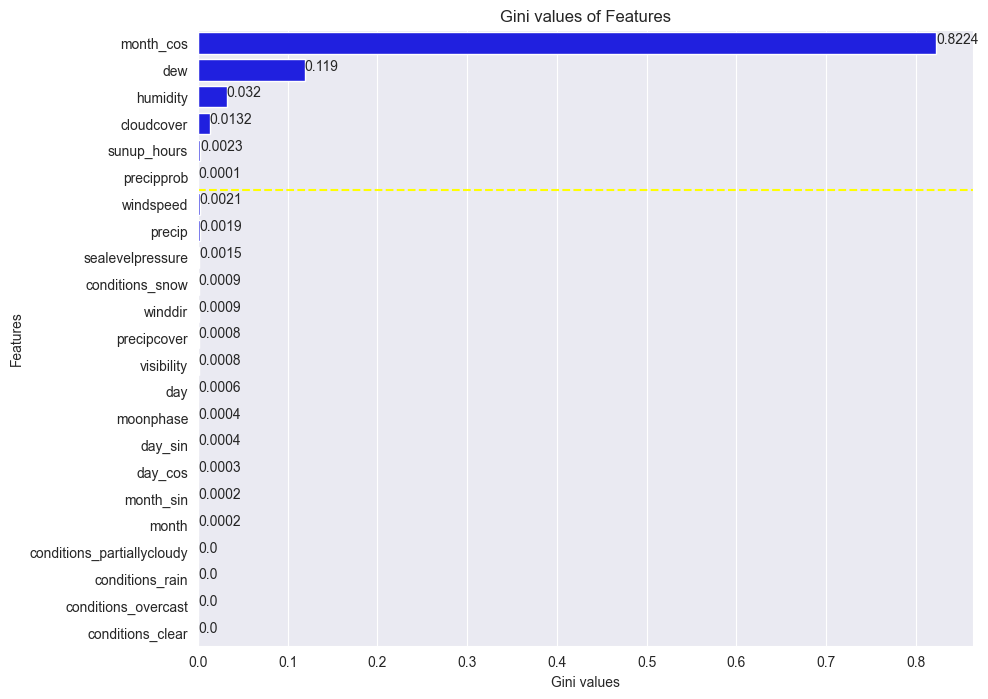

In [10]:
# Plot the gini value with the selected features
plot_selected_features(selected_features, all_feature_importance)

In [11]:
# Filter the samples to only include the selected features
x_train_rdy = x_train[list(selected_features.iloc[:, 0])]
x_cv_rdy = x_cv[list(selected_features.iloc[:, 0])]
x_test_rdy = x_test[list(selected_features.iloc[:, 0])]

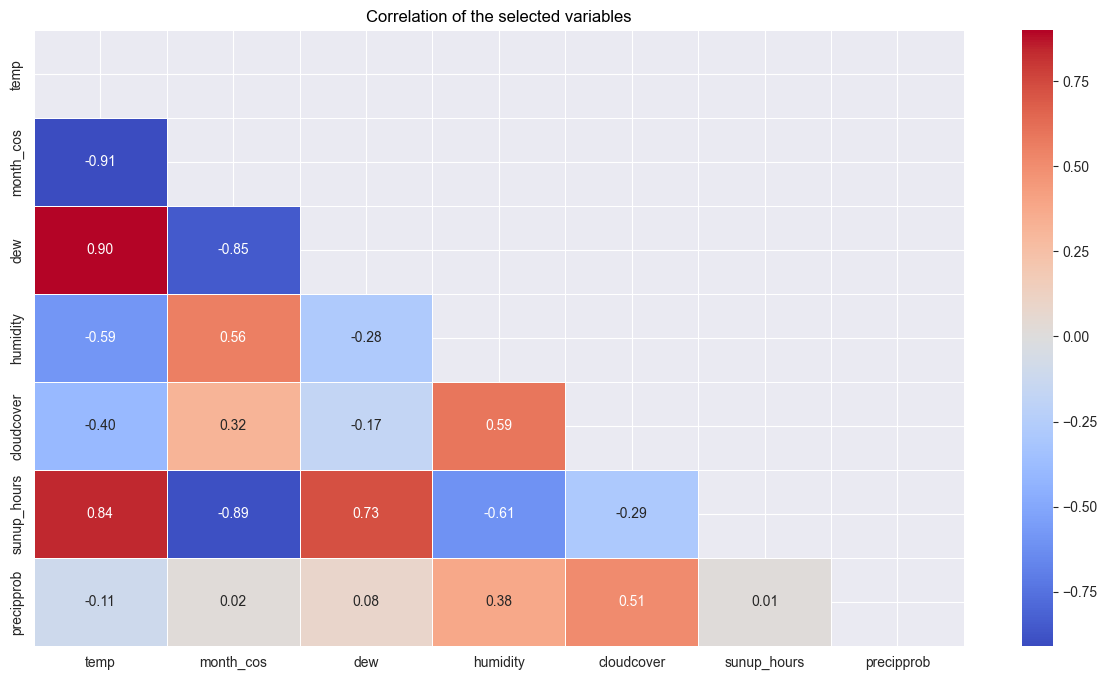

In [12]:
# Visualize the feature correlations via a heat map
plot_correlation_heatmap(x_train_rdy, y_train)

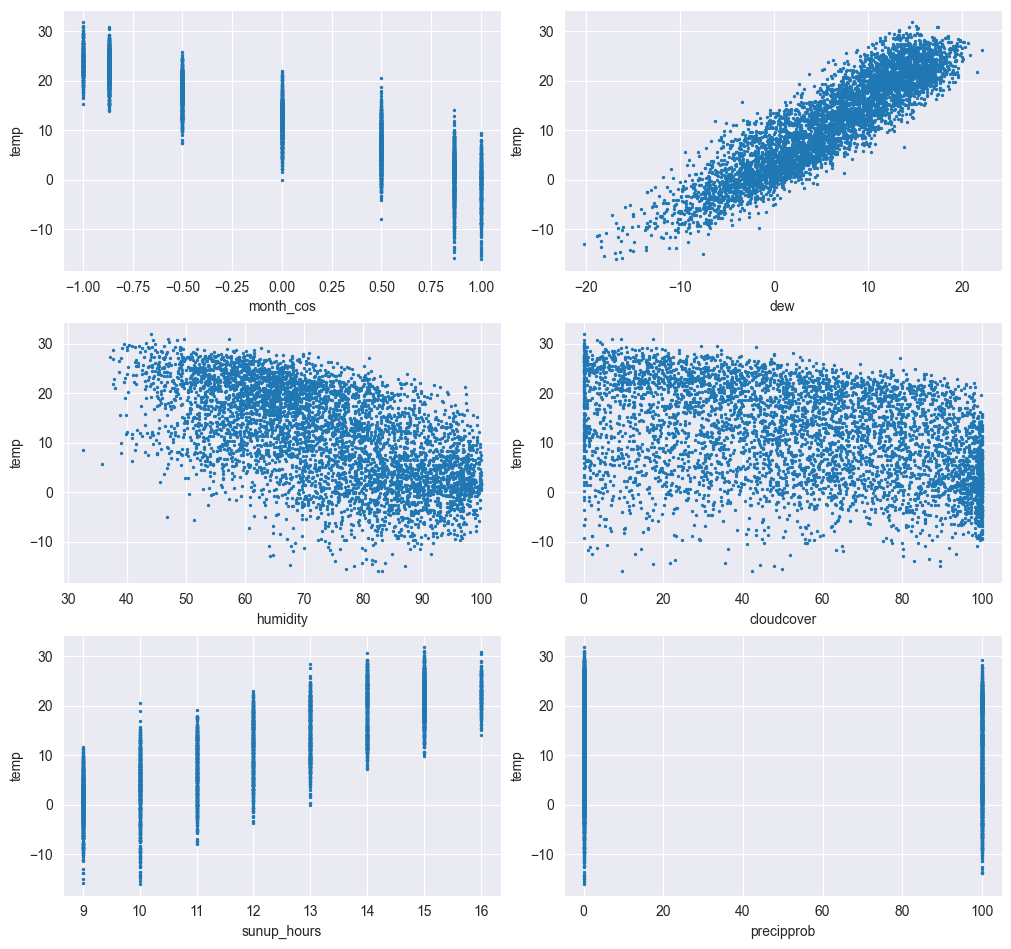

In [13]:
# Plot the selected features of the train sample
plot_features(x_train_rdy,y_train)

In [42]:
# Dictionaries to store models information
all_models = {}
all_mse = {}
all_standardscaler = {}
all_polyft = {}

55/55 [==============================] - 0s 641us/step
Development of the model with polynomial degree of 1
The MSE for the train set is 3.841066638178904 and the Cross Validation is: 4.277281566160401
55/55 [==============================] - 0s 575us/step
Development of the model with polynomial degree of 2
The MSE for the train set is 3.634766381960734 and the Cross Validation is: 4.4449033382768235
55/55 [==============================] - 0s 691us/step
Development of the model with polynomial degree of 3
The MSE for the train set is 3.2189786858382248 and the Cross Validation is: 5.6211544437347625
55/55 [==============================] - 0s 604us/step
Development of the model with polynomial degree of 4
The MSE for the train set is 3.1980012077414073 and the Cross Validation is: 5.815085188051296
55/55 [==============================] - 0s 651us/step
The mean squared error of the selected model of 1 polynomial degree on the test sample is 4.315283889328592


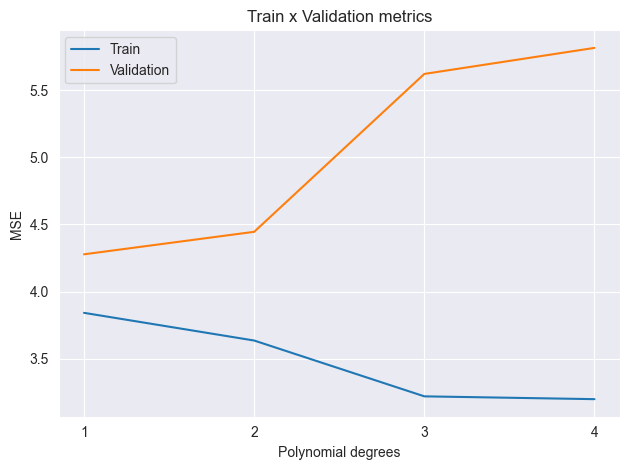

In [43]:
# Run a Neural Network with 3 LeakyReLU input layers with 24/16/8 units and alpha of 0.2 and a linear output layer using tensorflow.keras library
all_models['neural_network'], all_standardscaler['neural_network'], all_polyft['neural_network'], pred_test_nn, all_mse['neural_network'] = linear_neural_regression(x_train_rdy, y_train, x_cv_rdy, y_cv, x_test_rdy, y_test, max_degree=4, learning_rate=0.001, epochs=500,verbose=0)

The mean squared error for the polynomial degree of 1 on the train sample is: 4.396698848026347, the mean squared error on the crossvalidation sample is: 4.219467711712045
The mean squared error for the polynomial degree of 2 on the train sample is: 4.013764158122398, the mean squared error on the crossvalidation sample is: 3.9914406444600523
The mean squared error for the polynomial degree of 3 on the train sample is: 3.9021797161492344, the mean squared error on the crossvalidation sample is: 3.939563785029801
The mean squared error for the polynomial degree of 4 on the train sample is: 3.796838092417137, the mean squared error on the crossvalidation sample is: 4.098713649166646
The mean squared error for the polynomial degree of 5 on the train sample is: 3.5908831650128787, the mean squared error on the crossvalidation sample is: 4.673974480659391
The selected degree of polynomial is 3
The mean squared error of the selected model of 3 polynomial degree on the test sample is 4.192292

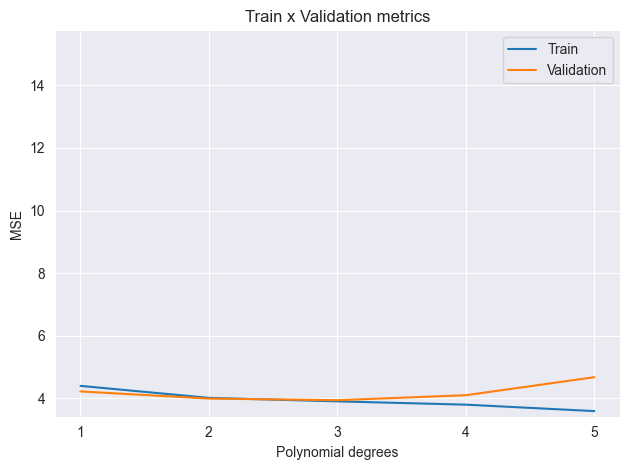

In [44]:
# Run a linear regression algorithm based on OLS (normal equation) using sci-kit learn library
all_models['ols'], all_standardscaler['ols'], all_polyft['ols'], pred_test_ols, all_mse['ols'] = linear_regression_ols(x_train_rdy, y_train, x_cv_rdy, y_cv, x_test_rdy, y_test)